# Image classification using CNN with CIFAR10 dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()  # loading the cifar10 dataset


170500096/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_train.shape)   # checking shapes of the training set and test set.
print(y_train.shape)
print(x_test.shape)
y_test.shape

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


(10000, 1)

In [5]:
classes = ["airplane", "automobile" , "bird", "cat", "deer", "dog" , "frog", "horse", "ship", "truck"]

In [6]:
y_train= y_train.reshape(-1,) # reshaping y_train

In [7]:
def sample(x,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

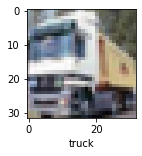

In [8]:
sample(x_train, y_train , 1)

In [9]:
x_train = x_train  / 255     # normalising the data
x_test = x_test / 255

In [10]:
# building a simple ANN 

model = models.Sequential([
          
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 5s 2ms/step - loss: 1.9364 - accuracy: 0.3012
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6538 - accuracy: 0.4179
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5568 - accuracy: 0.4496
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4942 - accuracy: 0.4738
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4283 - accuracy: 0.4961


In [11]:
model.fit(x_train, y_train, epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3909 - accuracy: 0.5100
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3523 - accuracy: 0.5242
Epoch 3/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3172 - accuracy: 0.5368
Epoch 4/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2839 - accuracy: 0.5486
Epoch 5/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2548 - accuracy: 0.5588
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2242 - accuracy: 0.5720
Epoch 7/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1947 - accuracy: 0.5811
Epoch 8/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1667 - accuracy: 0.5917
Epoch 9/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1402 - accuracy: 0.6004
Epoch 10/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.113

In [12]:
# evaluating the model on test set

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3504 - accuracy: 0.5375


[1.350418210029602, 0.5375000238418579]

In [13]:
# building CNN model

# convolution and maxpool layers

cnn_model = models.Sequential([
    
    layers.Conv2D(filters= 32, kernel_size= (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters= 64, kernel_size= (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # fully connected layers
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')
    
    
])

cnn_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
cnn_model.fit(x_train, y_train , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.6741 - accuracy: 0.3893
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1048 - accuracy: 0.6099
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9533 - accuracy: 0.6680
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8352 - accuracy: 0.7097
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7572 - accuracy: 0.7370
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6679 - accuracy: 0.7663
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5922 - accuracy: 0.7971
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5392 - accuracy: 0.8127
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4723 - accuracy: 0.8383
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.41

In [15]:
cnn_model.evaluate(x_test, y_test)          # evaluating the cnn model performance on test data

313/313 [==============================] - 1s 2ms/step - loss: 1.0285 - accuracy: 0.6921


[1.028464674949646, 0.6920999884605408]

In [16]:
y_test = y_test.reshape(-1,)


In [17]:
y_pred = cnn_model.predict(x_test)  # predicting the labels for our test data using predict function.
y_pred[:10]

array([[2.31705144e-05, 2.00062186e-05, 1.76815283e-05, 9.37916517e-01,
        4.66229540e-06, 4.31999341e-02, 1.34639232e-03, 3.51241124e-06,
        1.74616817e-02, 6.46005446e-06],
       [1.02693819e-04, 1.07865933e-04, 4.15326662e-09, 4.46883336e-10,
        5.65615534e-13, 1.58687701e-12, 4.56051375e-13, 1.97631611e-13,
        9.99787509e-01, 1.87030128e-06],
       [1.23578265e-01, 1.31576851e-01, 1.04148209e-03, 8.88182723e-04,
        8.41171597e-04, 2.85106562e-05, 1.06115273e-04, 2.40348527e-04,
        7.31865644e-01, 9.83342528e-03],
       [8.89552832e-01, 4.03226614e-02, 9.50002577e-03, 1.73872150e-03,
        1.63196775e-04, 1.43843703e-04, 1.60837721e-04, 4.05499508e-04,
        5.77593222e-02, 2.53119157e-04],
       [1.04692377e-09, 2.77768152e-07, 8.27161304e-04, 7.60111798e-05,
        9.96512234e-01, 3.68049564e-06, 2.57642264e-03, 4.27898385e-06,
        4.91470615e-08, 4.59387584e-10],
       [1.09523185e-07, 2.23773053e-08, 6.38048296e-05, 6.87929662e-03,
   

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
y_test[:5]

[3, 8, 8, 0, 4]


array([3, 8, 8, 0, 6], dtype=uint8)